In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../dataset/enade7.csv", sep = ';',decimal=',')
df.shape

(4415128, 27)

In [3]:
# Apaga NaN values
df.dropna(inplace=True)
df.shape

(4413756, 27)

## **Data Visualization**

----
### Grupos

In [4]:
dfv1 = df[['NU_ANO', 'NM_GRUPO','NT_GER','NT_FG','NT_CE']].groupby(['NU_ANO', 'NM_GRUPO']).mean()

In [5]:
# 2004
dfv1.loc[2004]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
AGRONOMIA,38.245209,37.090508,38.614067
EDUCAÇÃO FÍSICA,29.432406,32.043448,28.546078
ENFERMAGEM,33.352757,36.412801,32.315897
FARMÁCIA,29.755640,38.281021,26.897189
FISIOTERAPIA,36.003404,41.019951,34.314448
FONOAUDIOLOGIA,51.144233,40.818403,54.569734
MEDICINA,37.206785,53.909349,31.623778
MEDICINA VETERINÁRIA,31.277508,39.229039,28.610662
NUTRIÇÃO,30.040298,35.529271,28.193848


In [6]:
# 2005
dfv1.loc[2005]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
ARQUITETURA E URBANISMO,41.823704,49.803181,39.148216
BIOLOGIA,32.154065,57.842184,23.574910
CIENCIAS SOCIAIS,41.894767,46.730102,40.284600
COMPUTACAO,34.312009,55.159797,27.362061
ENGENHARIA (GRUPO I),39.323059,55.019600,34.073886
ENGENHARIA (GRUPO II),36.198559,55.208291,29.845252
ENGENHARIA (GRUPO III),42.842170,57.163196,38.052531
ENGENHARIA (GRUPO IV),41.621534,60.019970,35.486696
ENGENHARIA (GRUPO V),44.627450,61.471879,39.007181


In [7]:
# 2006
dfv1.loc[2006]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
ADMINISTRAÇÃO,38.200697,42.312692,36.813340
ARQUIVOLOGIA,44.898128,50.841498,42.914197
BIBLIOTECONOMIA,41.087597,47.370415,38.984701
BIOMEDICINA,38.201118,47.155856,35.220049
CIÊNCIAS ECONÔMICAS,35.064029,45.578827,31.543062
CIÊNICAS CONTÁBEIS,30.706568,44.356119,26.146960
COMUNICACAO SOCIAL,39.531766,47.417887,36.902157
DESIGN,47.059975,48.275866,46.671514
DIREITO,39.233423,48.217034,36.235639


In [8]:
# 2007
dfv1.loc[2007]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
AGRONOMIA,45.835107,51.495499,43.932393
BIOMEDICINA,36.884202,50.286715,32.400041
EDUCAÇÃO FÍSICA,45.877903,44.566718,46.298714
ENFERMAGEM,32.867427,43.806316,29.204358
FARMÁCIA,38.678311,49.529037,35.044868
FISIOTERAPIA,41.298411,48.016446,39.042963
FONOAUDIOLOGIA,51.636618,47.921338,52.860669
MEDICINA,47.312245,64.232901,41.656839
MEDICINA VETERINÁRIA,39.441221,50.213094,35.833853


In [9]:
# 2008
dfv1.loc[2008]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
ARQUITETURA E URBANISMO,41.530345,50.932310,38.380733
BIOLOGIA,37.722035,49.787133,33.683890
CIENCIAS SOCIAIS,40.032122,43.838285,38.749568
COMPUTACAO,32.322223,47.829766,27.136396
ENGENHARIA (GRUPO I),35.030598,51.480670,29.530522
ENGENHARIA (GRUPO II),34.704372,52.286346,28.826785
ENGENHARIA (GRUPO III),39.752035,52.501126,35.486072
ENGENHARIA (GRUPO IV),37.904072,55.444726,32.040686
ENGENHARIA (GRUPO V),40.791220,56.678726,35.479788


In [10]:
# 2009
dfv1.loc[2009]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
ADMINISTRAÇÃO,35.374454,41.718079,33.310336
ARQUIVOLOGIA,45.522071,46.444550,45.258719
BIBLIOTECONOMIA,43.601364,42.137953,44.138743
CIÊNCIAS ECONÔMICAS,35.835353,47.884408,31.868128
CIÊNICAS CONTÁBEIS,30.707159,39.037186,27.978652
COMUNICACAO SOCIAL,44.462092,40.809623,45.728429
DESIGN,46.581105,46.448656,46.677200
DIREITO,46.817396,46.784571,46.879130
ESTATISTICA,28.325890,42.689858,23.587900


In [11]:
# 2010
dfv1.loc[2010]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
AGRONOMIA,41.966791,42.401324,41.805317
BIOMEDICINA,36.903049,45.064983,34.165828
EDUCAÇÃO FÍSICA,37.308319,36.239943,37.647870
ENFERMAGEM,42.452378,43.251638,42.169252
FARMÁCIA,39.562776,43.309339,38.297265
FISIOTERAPIA,36.573231,45.325630,33.639473
FONOAUDIOLOGIA,42.016981,46.950384,40.356429
MEDICINA,47.698799,58.434312,44.103806
MEDICINA VETERINÁRIA,39.532558,44.481504,37.866722


In [12]:
# 2011
dfv1.loc[2011]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
ARQUITETURA E URBANISMO,45.369708,50.900401,43.510086
ARTES VISUAIS (LICENCIATURA),51.409324,51.760684,51.276379
BIOLOGIA (BACHARELADO),46.964903,54.050764,44.586188
BIOLOGIA (LICENCIATURA),44.099206,52.643516,41.233957
CIÊNCIAS SOCIAIS (BACHARELADO),33.511685,40.392341,31.205295
CIÊNCIAS SOCIAIS (LICENCIATURA),31.866685,40.731536,28.898598
COMPUTAÇÃO (BACHARELADO),32.928553,49.847567,27.272704
COMPUTAÇÃO (ENGENHARIA DE COMPUTAÇÃO),36.064039,51.783808,30.808975
COMPUTAÇÃO (LICENCIATURA),32.609256,54.154780,25.408649


In [13]:
# 2012
dfv1.loc[2012]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
ADMINISTRAÇÃO,34.959705,42.998251,32.263771
CIÊNCIAS ECONÔMICAS,31.192781,43.254496,27.155978
CIÊNICAS CONTÁBEIS,34.689125,39.532478,33.057764
DESIGN,45.931774,42.293783,47.128047
DIREITO,40.952314,46.163404,39.198887
JORNALISMO,45.591747,42.014656,46.767907
PSICOLOGIA,38.783169,42.086446,37.666311
PUBLICIDADE E PROPAGANDA,37.928442,40.625273,37.013011
RELAÇÕES INTERNACIONAIS,43.642882,47.753692,42.257797


In [14]:
# 2013
dfv1.loc[2013]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
AGRONOMIA,53.584552,48.478113,55.270064
BIOMEDICINA,48.081758,49.690211,47.529765
EDUCAÇÃO FÍSICA (LICENCIATURA),49.769462,43.710639,51.772258
ENFERMAGEM,51.538873,44.694090,53.803619
FARMÁCIA,42.195607,47.938078,40.264779
FISIOTERAPIA,48.662211,45.949727,49.549836
FONOAUDIOLOGIA,51.348412,43.975138,53.788398
MEDICINA,48.174445,56.331294,45.439383
MEDICINA VETERINÁRIA,45.541531,48.089507,44.675633


In [15]:
# 2014
dfv1.loc[2014]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
ARQUITETURA E URBANISMO,46.969093,57.070225,43.585145
ARTES VISUAIS (LICENCIATURA),42.907498,51.015379,40.188505
BIOLOGIA (BACHARELADO),48.573642,61.064619,44.393319
BIOLOGIA (LICENCIATURA),43.430386,55.570734,39.366097
CIÊNCIAS SOCIAIS (BACHARELADO),45.944249,56.292860,42.480256
CIÊNCIAS SOCIAIS (LICENCIATURA),40.542497,52.233550,36.630134
COMPUTAÇÃO (BACHARELADO),44.596267,59.675276,39.553168
COMPUTAÇÃO (LICENCIATURA),50.089827,54.169290,48.712092
COMPUTAÇÃO (SISTEMAS DE INFORMAÇÃO),43.756306,56.756956,39.405997


In [16]:
# 2015
dfv1.loc[2015]

,NT_GER,NT_FG,NT_CE
NM_GRUPO,,,
ADMINISTRAÇÃO,42.326101,53.604760,38.549990
ADMINISTRAÇÃO PÚBLICA,55.528813,59.532372,54.176588
CIÊNCIAS ECONÔMICAS,42.181806,58.527369,36.715926
CIÊNICAS CONTÁBEIS,41.338601,51.269053,38.011543
DESIGN,50.434467,56.574970,48.371705
DIREITO,45.718700,59.215716,41.203211
JORNALISMO,47.062930,58.778603,43.142340
PSICOLOGIA,47.290540,57.035888,44.025693
PUBLICIDADE E PROPAGANDA,51.649251,56.783429,49.921386


In [17]:
# 2016
dfv1.loc[2016].mean()

NT_GER    46.817741
NT_FG     44.389364
NT_CE     47.610375
dtype: float64

In [18]:
# 2017
dfv1.loc[2017].mean()

NT_GER    44.503451
NT_FG     53.110151
NT_CE     41.618048
dtype: float64

-------
### Participações no Exame

#### **Ciclo Avaliativo Triênial**

* Ciclo 1 (ou ano I): Saúde, Ciências agrárias e áreas afins
* Ciclo 2 (ou ano II): Licenciaturas, Ciências Exatas e áreas afins
* Ciclo 3 (ou ano III): Ciências Sociais Aplicadas, Ciências Humanas e áreas afins 

** Fonte: http://download.inep.gov.br/educacao_superior/enade/documentos/2018/PressKit_Enade_2018.pdf

In [19]:
dfp = df.groupby(['NU_ANO', 'NM_INSCRICAO', 'CICLO']).size().reset_index(name='COUNT')
dfp

,NU_ANO,NM_INSCRICAO,CICLO,COUNT
0,2004,Concluinte,Ciclo 1,51303
1,2004,Ingressante,Ciclo 1,74170
2,2005,Concluinte,Ciclo 2,136865
3,2005,Ingressante,Ciclo 2,154754
4,2006,Concluinte,Ciclo 3,150622
5,2006,Ingressante,Ciclo 3,179662
6,2007,Concluinte,Ciclo 1,64702
7,2007,Ingressante,Ciclo 1,105532
8,2008,Concluinte,Ciclo 2,185556
9,2008,Ingressante,Ciclo 2,206470


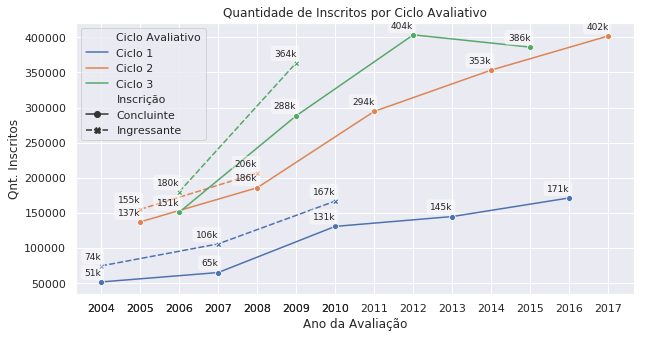

In [20]:
sns.set()
fig = plt.figure(figsize=(10, 5))

# Nomes mudados para a legenda
dfp['Ciclo Avaliativo'] = dfp['CICLO'] 
dfp['Inscrição'] = dfp['NM_INSCRICAO']

ax = sns.lineplot(x="NU_ANO", y="COUNT", hue="Ciclo Avaliativo", style="Inscrição", 
                  data=dfp, markers=True)
ax.set_title('Quantidade de Inscritos por Ciclo Avaliativo')
ax.set_xlabel('Ano da Avaliação')
ax.set_ylabel('Qnt. Inscritos')

# Exibir todos os anos no eixo x
plt.xticks(dfp['NU_ANO']) 

# Números indicados nos marcadores
for i,j in zip(dfp['NU_ANO'], dfp['COUNT']):
    ax.annotate(str(round(j/1000))+"k",xy=(i,j), ha='right', fontsize=9,
                xytext=(i, j+10000), bbox=dict(boxstyle='round', fc='w', alpha=0.4))
      
plt.savefig('Qnt Inscritos.png', dpi=800)


### Notas

* NT_GER: Nota Geral
* NT_CE: Nota Conhecimento Específico
* NT_FG: Nota Fundamentos Gerais

In [21]:
#dfn = df[['NU_ANO', 'CICLO', 'NM_INSCRICAO', 'NT_GER','NT_FG','NT_CE']].groupby(['NU_ANO','CICLO']).mean()

dfc1 = df[df['CICLO'] == 'Ciclo 1']
dfc2 = df[df['CICLO'] == 'Ciclo 2']
dfc3 = df[df['CICLO'] == 'Ciclo 3']

dfc1 = dfc1[dfc1['NM_INSCRICAO'] == 'Concluinte']
dfc2 = dfc2[dfc2['NM_INSCRICAO'] == 'Concluinte']
dfc3 = dfc3[dfc3['NM_INSCRICAO'] == 'Concluinte']

dfc1 = dfc1.groupby(['NU_ANO', 'NM_INSCRICAO']).agg('mean').reset_index()
dfc2 = dfc2.groupby(['NU_ANO', 'NM_INSCRICAO']).agg('mean').reset_index()
dfc3 = dfc3.groupby(['NU_ANO', 'NM_INSCRICAO']).agg('mean').reset_index()

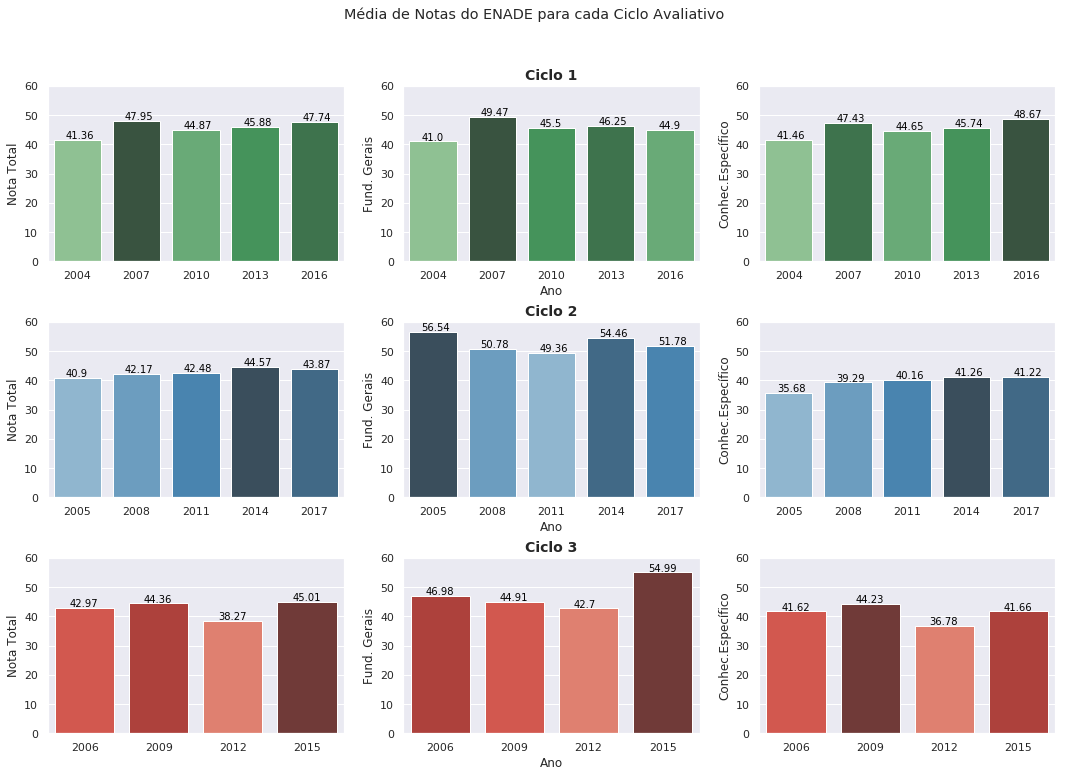

In [22]:
fig = plt.figure(figsize=(15, 11))
fig.suptitle('Média de Notas do ENADE para cada Ciclo Avaliativo')

sns.set()

plt.subplot(331)
pal = sns.color_palette("Greens_d", len(dfc1))
rank = dfc1["NT_GER"].argsort().argsort() 
ax1 = sns.barplot(x="NU_ANO", y="NT_GER", data=dfc1, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(332)
pal = sns.color_palette("Greens_d", len(dfc1))
rank = dfc1["NT_FG"].argsort().argsort() 
ax2 = sns.barplot(x="NU_ANO", y="NT_FG", data=dfc1, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(333)
pal = sns.color_palette("Greens_d", len(dfc1))
rank = dfc1["NT_CE"].argsort().argsort() 
ax3 = sns.barplot(x="NU_ANO", y="NT_CE", data=dfc1, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(334)
pal = sns.color_palette("Blues_d", len(dfc2))
rank = dfc2["NT_GER"].argsort().argsort() 
ax4 = sns.barplot(x="NU_ANO", y="NT_GER", data=dfc2, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(335)
pal = sns.color_palette("Blues_d", len(dfc2))
rank = dfc2["NT_FG"].argsort().argsort() 
ax5 = sns.barplot(x="NU_ANO", y="NT_FG", data=dfc2, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(336)
pal = sns.color_palette("Blues_d", len(dfc2))
rank = dfc2["NT_CE"].argsort().argsort() 
ax6 = sns.barplot(x="NU_ANO", y="NT_CE", data=dfc2, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(337)
pal = sns.color_palette("Reds_d", len(dfc3))
rank = dfc3["NT_GER"].argsort().argsort() 
ax7 = sns.barplot(x="NU_ANO", y="NT_GER", data=dfc3, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(338)
pal = sns.color_palette("Reds_d", len(dfc3))
rank = dfc3["NT_FG"].argsort().argsort() 
ax8 = sns.barplot(x="NU_ANO", y="NT_FG", data=dfc3, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(339)
pal = sns.color_palette("Reds_d", len(dfc3))
rank = dfc3["NT_CE"].argsort().argsort() 
ax9 = sns.barplot(x="NU_ANO", y="NT_CE", data=dfc3, errwidth=False, palette=np.array(pal[::-1])[rank])

ax2.set_title('Ciclo 1', fontweight="bold", fontsize=14)
ax5.set_title('Ciclo 2', fontweight="bold", fontsize=14)
ax8.set_title('Ciclo 3', fontweight="bold", fontsize=14)

axis = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for ax in axis:
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()+0.5,\
                str(round((i.get_height()), 2)), fontsize=10, color='black')
    
    if ax == ax1 or ax == ax4 or ax == ax7:
        ax.set_ylabel('Nota Total')
        ax.set_xlabel('')
    elif ax == ax2 or ax == ax5 or ax == ax8:
        ax.set_ylabel('Fund. Gerais')
        ax.set_xlabel('Ano')
    else:
        ax.set_ylabel('Conhec.Específico')
        ax.set_xlabel('')
        
    ax.set_ylim([0, 60])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig('Notas Ciclos - Anos.png', dpi=800)

In [23]:
dfc = df[df['NM_INSCRICAO'] == 'Concluinte']
dfc = dfc[['CICLO', 'NT_GER', 'NT_FG', 'NT_CE']].groupby(['CICLO']).mean().reset_index()

dfc

,CICLO,NT_GER,NT_FG,NT_CE
0,Ciclo 1,46.039000,45.556054,46.183457
1,Ciclo 2,43.225703,52.290286,40.188066
2,Ciclo 3,42.392274,47.602487,40.655840


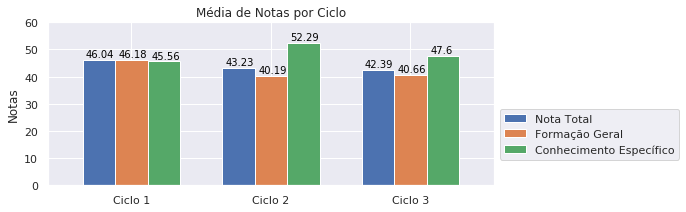

In [24]:
#fig = plt.figure(figsize=(15, 11))
sns.set()
ax = dfc.plot(x='CICLO', y=['NT_GER', 'NT_CE', 'NT_FG'], kind='bar', 
              legend=False, figsize=(8,3), width=0.7, 
              title='Média de Notas por Ciclo')

lgd = ax.legend(labels=['Nota Total', 'Formação Geral', 'Conhecimento Específico'], loc='best',
          bbox_to_anchor=(1, 0.5))
text = ax.text(-0.3,1, None, transform=ax.transAxes)

ax.set_xticklabels(dfc['CICLO'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Notas')
ax.set_ylim([0, 60]) 

for i in ax.patches:
    ax.text(i.get_x()+0.025, i.get_height()+1,\
            str(round((i.get_height()), 2)), fontsize=10, color='black') 
    
fig = ax.get_figure()
fig.savefig('Notas Ciclos - Total.png', dpi=800, bbox_extra_artists=(lgd, text), bbox_inches='tight')

-----
### Áreas de Estudo

* Áreas existentes de acordo com o INEP
    * Agricultura e Veterinária
    * Ciências
    * Ciências Sociais
    * Educacão
    * Engenharia
    * Humanidades e Artes
    * Saúde e Bem-Estar
    * Serviços

* Informações oriundas dos microdados Censo do Ensino Superios 
* Fonte: http://portal.inep.gov.br/censo-da-educacao-superior

In [25]:
dfa = df[df['NM_INSCRICAO'] == 'Concluinte']
dfa = dfa.groupby(['NM_AREA']).size().reset_index(name='COUNT')
dfa

,NM_AREA,COUNT
0,Agricultura e Veterinária,69230
1,Ciências,184638
2,Ciências Sociais,1142212
3,Educação,857458
4,Engenharia,352857
5,Humanidades e Artes,56014
6,Saúde e Bem-Estar,433487
7,Serviços,67007


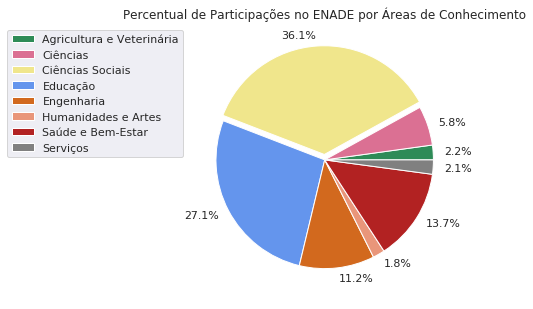

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dfa['COUNT']
labels = dfa['NM_AREA']
perc = data.apply(lambda x: round(x/sum(data)*100, 1)).apply(lambda y: str(y)+"%")

explode = (0, 0, 0.05, 0, 0, 0, 0, 0)
colors=['seagreen', 'palevioletred', 'khaki', 'cornflowerblue', 
        'chocolate', 'darksalmon', 'firebrick', 'gray']

ax.pie(data, explode=explode, colors=colors,
       labels=perc, autopct='', startangle=0)

legend = ax.legend(labels,loc="upper right", bbox_to_anchor=(0, 0.5, 0, 0.5))

text = ax.text(-0.3,0, None, transform=ax.transAxes)

ax.set_title('Percentual de Participações no ENADE por Áreas de Conhecimento')

plt.savefig('Participação Áreas.png', dpi=800, bbox_extra_artists=(legend, text), bbox_inches='tight')

In [27]:
dfa = df[df['NM_INSCRICAO'] == 'Concluinte']
dfa = dfa[['NM_AREA', 'NT_GER', 'NT_FG', 'NT_CE']].groupby(['NM_AREA']).mean().reset_index()
dfa = dfa.sort_values('NT_GER', ascending=False)

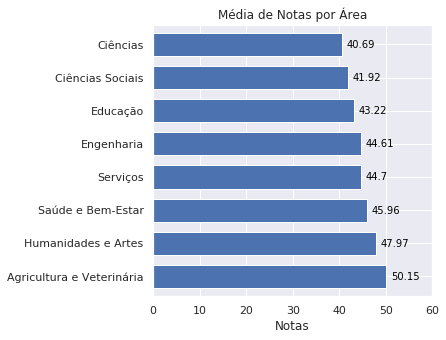

In [28]:
#fig = plt.figure(figsize=(15, 11))
#sns.set()
ax = dfa.plot(x='NM_AREA', y=['NT_GER'], kind='barh', 
              legend=False, figsize=(5,5), width=0.7, 
              title='Média de Notas por Área')

text = ax.text(-0.3,1, None, transform=ax.transAxes)

ax.set_xlabel('Notas')
ax.set_ylabel('')
ax.set_xlim([0, 60]) 

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.25,\
            str(round((i.get_width()), 2)), fontsize=10, color='black') 
fig = ax.get_figure()
fig.savefig('Médias por Área.png', dpi=800, bbox_inches='tight')